# EXPLORATORY DATA ANALYSIS
### -Data Magician Team-
##### Dataset : datatrain from (https://www.kaggle.com/datasets/reverie5/av-janata-hack-payment-default-prediction)


### Data and Library Import


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dftrain = pd.read_csv('train_20D8GL3.csv')
dftrain.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [3]:
dftrain.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
dftrain['SEX']=dftrain['SEX'].replace({1 : 'male', 2 : 'female'})
dftrain['EDUCATION'] = dftrain['EDUCATION'].replace({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'unknown', 6 : 'unknown', 0 : 'others'})
dftrain['MARRIAGE']= dftrain['MARRIAGE'].replace({1 : 'married', 2 : 'single', 3 : 'divorced', 0 : 'others'})
pay_data = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in pay_data:
    dftrain[i] = dftrain[i].astype('object')

In [4]:
dftrain.sample(5)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
15294,648,80000,female,university,single,24,0,0,0,0,...,55639,56873,58390,3100,2586,2000,2500,3000,2500,0
1428,8561,50000,female,university,married,32,-1,-1,-1,-1,...,316,316,316,282,350,316,316,316,316,0
3665,16683,350000,male,university,single,36,0,0,0,0,...,234254,211309,210897,8026,9503,9015,7511,8011,7361,0
14447,9215,20000,male,university,married,48,1,4,3,2,...,17270,16713,16297,0,0,1500,0,0,3000,1
10668,29643,110000,male,graduate school,single,29,2,0,0,0,...,86309,84028,86114,3430,4000,7100,0,3600,3142,1


### Handle missing values

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          21000 non-null  int64 
 1   LIMIT_BAL                   21000 non-null  int64 
 2   SEX                         21000 non-null  object
 3   EDUCATION                   21000 non-null  object
 4   MARRIAGE                    21000 non-null  object
 5   AGE                         21000 non-null  int64 
 6   PAY_1                       21000 non-null  object
 7   PAY_2                       21000 non-null  object
 8   PAY_3                       21000 non-null  object
 9   PAY_4                       21000 non-null  object
 10  PAY_5                       21000 non-null  object
 11  PAY_6                       21000 non-null  object
 12  BILL_AMT1                   21000 non-null  int64 
 13  BILL_AMT2                   21000 non-null  in

In [6]:
print(f'Terdapat missing data sebanyak {dftrain.isnull().sum().sum()}')

Terdapat missing data sebanyak 0


Dari data di atas diketahui :

1. Dataframe terdiri 21000 baris

2. Tidak ada kolom yang memiliki nilai null/missing value

3. Terdapat beberapa tipe data kategorikal yang belum diubah value nya (masih dalam bentuk data numerikal)


In [7]:
cats = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
nums = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for i in cats:
    print(f'Value count kolom {i}:')
    print(dftrain[i].value_counts())
    print()

Value count kolom SEX:
female    12759
male       8241
Name: SEX, dtype: int64

Value count kolom EDUCATION:
university         9789
graduate school    7415
high school        3467
unknown             234
others               95
Name: EDUCATION, dtype: int64

Value count kolom MARRIAGE:
single      11184
married      9561
divorced      219
others         36
Name: MARRIAGE, dtype: int64

Value count kolom PAY_1:
 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_1, dtype: int64

Value count kolom PAY_2:
 0    11043
-1     4174
 2     2776
-2     2643
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: PAY_2, dtype: int64

Value count kolom PAY_3:
 0    11056
-1     4125
-2     2868
 2     2670
 3      173
 4       55
 7       22
 5       14
 6       13
 8        2
 1        2
Name: PAY_3, dtype: int64

Value count kolom PAY_4:
 0    11542
-1     3949
-2     30

**STATISTICAL SUMMARY**

In [8]:
dftrain[cats].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,21000,21000,21000,21000,21000,21000,21000,21000,21000
unique,2,5,4,11,11,11,10,10,10
top,female,university,single,0,0,0,0,0,0
freq,12759,9789,11184,10324,11043,11056,11542,11852,11450


Berdasarkan hasil pengamatan di atas :

1. Data didominasi (proporsi lebih dari 50% dari jumlah baris data) oleh perempuan untuk kolom SEX, single untuk kolom MARRIAGE, berhasil bayar untuk kolom default_payment_next_month, nilai 0 untuk kolom PAY_1, PAY_2, PAY_3, PAY_4, PAY_5 dan PAY_6


In [9]:
dftrain[nums].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167214.746667,35.461619,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,128965.188482,9.206628,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,10000.000000,21.000000,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,140000.000000,34.000000,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,800000.000000,75.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


Beberapa pengamatan Sementara:

1. Tampaknya ada issue pada nilai minimal untuk kolom BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 (bernilai negatif), akan di-(?) di langkah selanjutnya

2. Kolom dengan tipe data numerikal, tampaknya skew ke kanan (long-right tail, mean > median)


### Handle duplicated data

In [10]:
print(f'Jumlah baris data duplikat = {dftrain.duplicated().sum()}')

Jumlah baris data duplikat = 0


tidak ada data duplikat

### split data

In [11]:
ind_var = dftrain.drop('default_payment_next_month',axis = 1)
ind_var = ind_var.columns.to_list() #kolom independent variable

In [12]:
X = dftrain[ind_var]
y = dftrain[['default_payment_next_month']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Handle outliers

In [13]:
merge_train = pd.concat([X_train,y_train], axis = 1)
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14700 entries, 16485 to 15795
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          14700 non-null  int64 
 1   LIMIT_BAL                   14700 non-null  int64 
 2   SEX                         14700 non-null  object
 3   EDUCATION                   14700 non-null  object
 4   MARRIAGE                    14700 non-null  object
 5   AGE                         14700 non-null  int64 
 6   PAY_1                       14700 non-null  object
 7   PAY_2                       14700 non-null  object
 8   PAY_3                       14700 non-null  object
 9   PAY_4                       14700 non-null  object
 10  PAY_5                       14700 non-null  object
 11  PAY_6                       14700 non-null  object
 12  BILL_AMT1                   14700 non-null  int64 
 13  BILL_AMT2                   14700 non-null

Sebelum dilakukan penanganan nilai outlier, akan dicek terlebih dahulu distribusi dari tiap feature agar dapat ditentukan penanganan yang tepat.


<Axes: xlabel='AGE'>

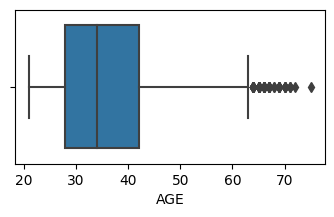

In [14]:
# Check Age Distribution
fig, ax = plt.subplots(figsize=(4, 2))
sns.boxplot(x = merge_train['AGE'], ax = ax)

<Axes: xlabel='LIMIT_BAL'>

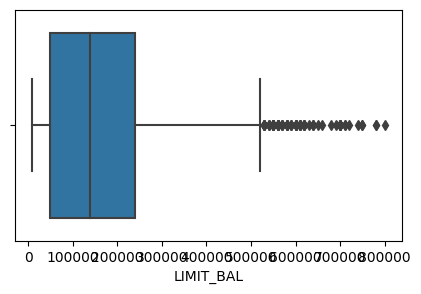

In [15]:
# Checking LIMIT_BAL outliers
fig, ax = plt.subplots(figsize=(5, 3))
sns.boxplot(x = merge_train['LIMIT_BAL'], ax = ax)

jika dilihat dari nilai upper bound (Q3 + 1.5*IQR), terdapat outlier pada feature AGE, dan LIMIT_BAL.


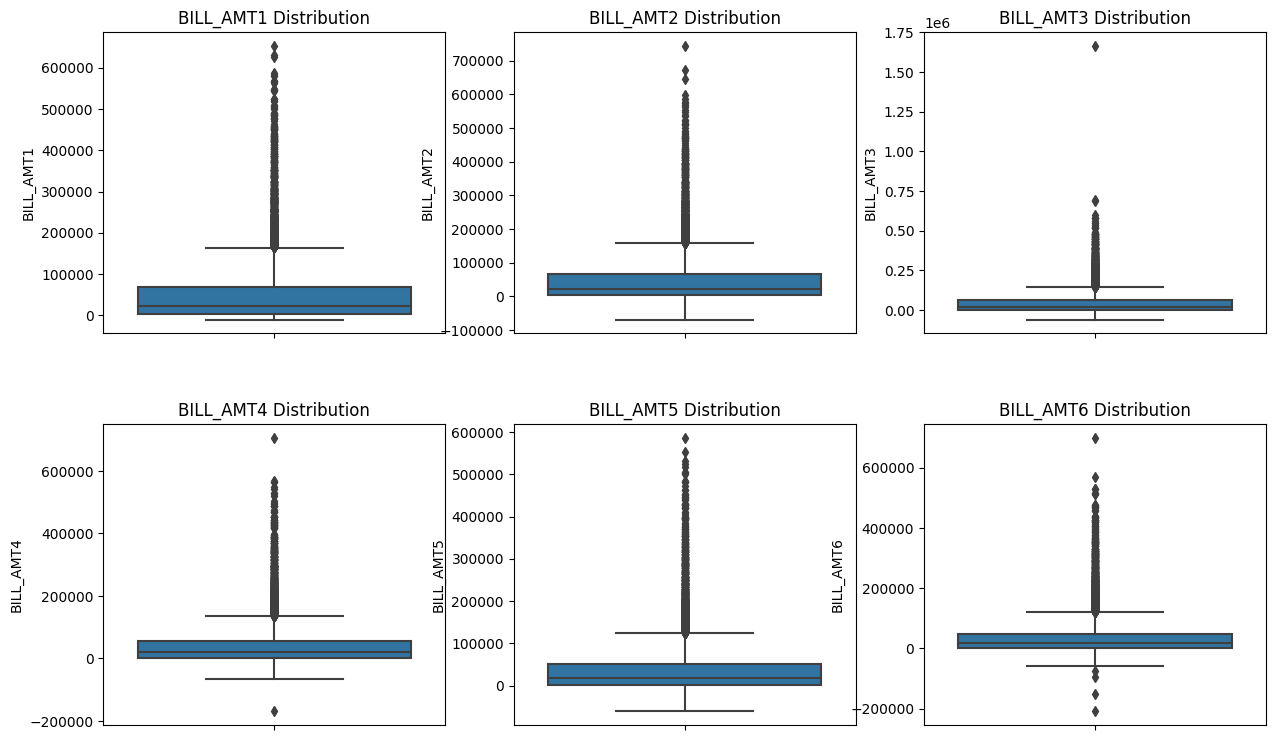

In [16]:
# BILL BOX PLOT
bill_boxplot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(15, 9))

sns.boxplot(y = merge_train['BILL_AMT1'], ax = axs[0,0])
axs[0,0].set_title('BILL_AMT1 Distribution')
sns.boxplot(y = merge_train['BILL_AMT2'], ax = axs[0,1])
axs[0,1].set_title('BILL_AMT2 Distribution')
sns.boxplot(y = merge_train['BILL_AMT3'], ax = axs[0,2])
axs[0,2].set_title('BILL_AMT3 Distribution')
sns.boxplot(y = merge_train['BILL_AMT4'], ax = axs[1,0])
axs[1,0].set_title('BILL_AMT4 Distribution')
sns.boxplot(y = merge_train['BILL_AMT5'], ax = axs[1,1])
axs[1,1].set_title('BILL_AMT5 Distribution')
sns.boxplot(y = merge_train['BILL_AMT6'], ax = axs[1,2])
axs[1,2].set_title('BILL_AMT6 Distribution')

bill_boxplot.subplots_adjust(hspace=0.3)

Terdapat outlier pada feature BILL_AMT3, dan BILL_AMT 6 yang ekstrim, dan hal ini mungkin akan menurunkan performa model prediksi. Dan pada feature BILL_AMT1 hingga BILL_AMT6 terdapat nilai negatif, dimana data ini dapat menunjukkan adanya sejumlah pembayaran berlebih pada bulan-bulan sebelumnya.


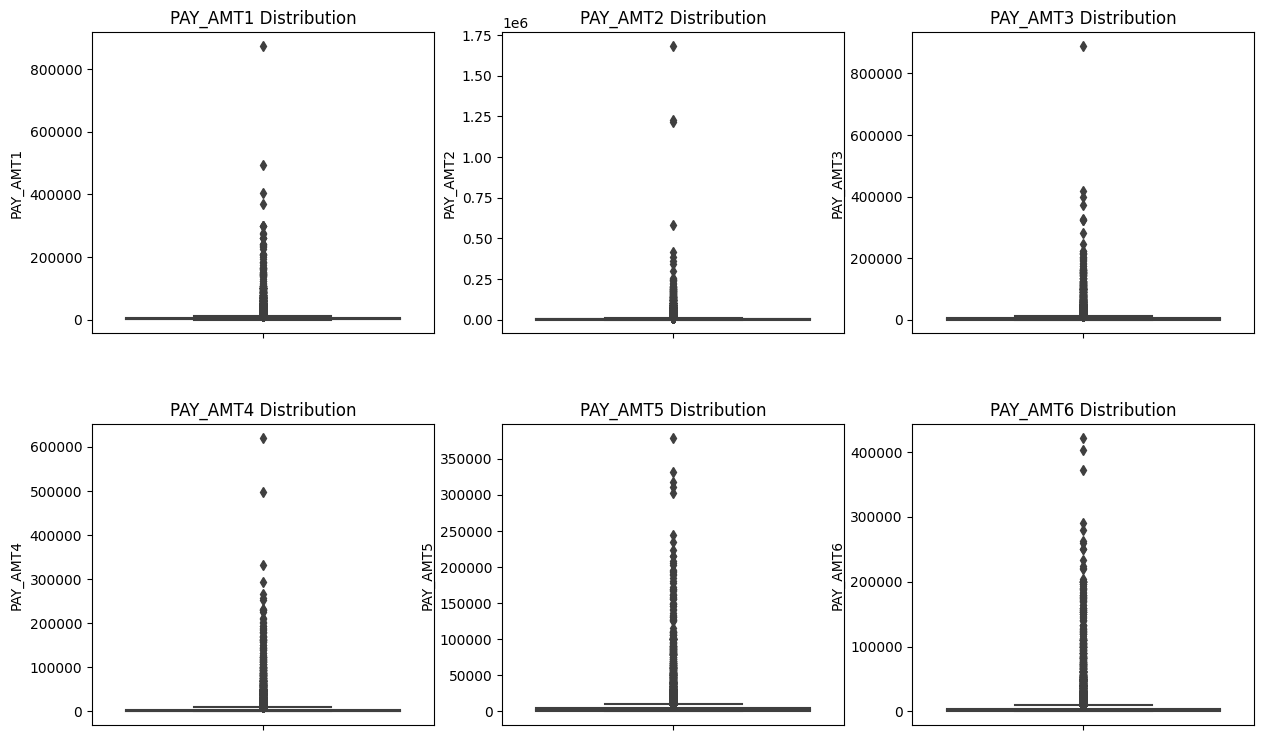

In [17]:
# PAY BOX PLOT
pay_boxplot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(15, 9))

sns.boxplot(y = merge_train['PAY_AMT1'], ax = axs[0,0])
axs[0,0].set_title('PAY_AMT1 Distribution')
sns.boxplot(y = merge_train['PAY_AMT2'], ax = axs[0,1])
axs[0,1].set_title('PAY_AMT2 Distribution')
sns.boxplot(y = merge_train['PAY_AMT3'], ax = axs[0,2])
axs[0,2].set_title('PAY_AMT3 Distribution')
sns.boxplot(y = merge_train['PAY_AMT4'], ax = axs[1,0])
axs[1,0].set_title('PAY_AMT4 Distribution')
sns.boxplot(y = merge_train['PAY_AMT5'], ax = axs[1,1])
axs[1,1].set_title('PAY_AMT5 Distribution')
sns.boxplot(y = merge_train['PAY_AMT6'], ax = axs[1,2])
axs[1,2].set_title('PAY_AMT6 Distribution')

pay_boxplot.subplots_adjust(hspace=0.3)

Terdapat nilai outlier yang sangat ekstrim pada feature PAY_AMT1 hingga PAY_AMT6, sehingga perlu dilakukan penanganan dengan penghapusan nilai outliers agar performa model dapat optimal.

Selanjutnya akan dilakukan drop baris yang memiliki data outlier dengan metode IQR.


In [18]:
# Outliers handling

print(f'Jumlah baris sebelum memfilter outlier : {len(merge_train)}')

for i in nums:
    q1 = merge_train[i].quantile(0.25)
    q3 = merge_train[i].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)
    filtered_entries = ((merge_train[i] >= low_limit) & (merge_train[i] <= high_limit))
    
merge_train = merge_train[filtered_entries] #filter untuk hanya mengambil value z-score < 3

print(f'Jumlah baris setelah memfilter outlier : {len(merge_train)}')

Jumlah baris sebelum memfilter outlier : 14700
Jumlah baris setelah memfilter outlier : 13245


In [19]:
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13245 entries, 16485 to 15795
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          13245 non-null  int64 
 1   LIMIT_BAL                   13245 non-null  int64 
 2   SEX                         13245 non-null  object
 3   EDUCATION                   13245 non-null  object
 4   MARRIAGE                    13245 non-null  object
 5   AGE                         13245 non-null  int64 
 6   PAY_1                       13245 non-null  object
 7   PAY_2                       13245 non-null  object
 8   PAY_3                       13245 non-null  object
 9   PAY_4                       13245 non-null  object
 10  PAY_5                       13245 non-null  object
 11  PAY_6                       13245 non-null  object
 12  BILL_AMT1                   13245 non-null  int64 
 13  BILL_AMT2                   13245 non-null

In [20]:
# memisahkan dataset train kembali
X_train = merge_train.drop('default_payment_next_month',axis = 1)
y_train = merge_train[['default_payment_next_month']]

### Feature transformation

In [21]:
#menggunakan standardization (scaler)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X[nums].columns.to_list()
for i in numerical_features:
    scaler = ss.fit(X_train[[i]])
    X_train[i] = scaler.transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

In [22]:
X_train.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,13245.000000,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04,1.324500e+04
mean,14990.589279,8.502909e-17,7.188579e-17,6.491179e-17,-1.072922e-17,-3.808874e-17,1.609383e-17,2.575013e-17,9.870884e-17,1.287507e-17,-1.180214e-17,3.111474e-17,-2.145844e-18,-1.180214e-17,6.544826e-17
std,8624.782032,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,1.000000,-1.207694e+00,-1.554403e+00,-9.069789e-01,-1.881413e+00,-1.516596e+00,-3.860511e+00,-1.758329e+00,-2.613412e+00,-3.451685e-01,-2.793835e-01,-3.130672e-01,-3.059016e-01,-3.175540e-01,-8.883237e-01
25%,7558.000000,-8.767557e-01,-7.997478e-01,-6.880194e-01,-6.917238e-01,-6.854665e-01,-6.817431e-01,-6.848557e-01,-6.850646e-01,-2.921459e-01,-2.427181e-01,-2.888627e-01,-2.918868e-01,-3.048103e-01,-8.883237e-01
50%,15113.000000,-2.148787e-01,-1.529007e-01,-4.046387e-01,-4.015007e-01,-3.924846e-01,-3.749521e-01,-3.647517e-01,-3.725607e-01,-1.980878e-01,-1.626147e-01,-1.935298e-01,-2.017913e-01,-1.992923e-01,-3.840434e-01
75%,22352.000000,5.297329e-01,6.017542e-01,2.575117e-01,2.541929e-01,2.438834e-01,2.186872e-01,2.423557e-01,2.597855e-01,1.003132e-02,-2.418523e-02,-1.956947e-02,-2.560449e-02,-2.020059e-02,4.869863e-01
max,29998.000000,5.162872e+00,4.267221e+00,9.601554e+00,1.030378e+01,1.109309e+01,1.234613e+01,9.221079e+00,9.933033e+00,3.593654e+01,7.136309e+01,2.916976e+01,3.949629e+01,2.603093e+01,3.612149e+00


###### Untuk skala pada nilai data train dan test sudah sama



### Feature encoding

Feature SEX akan dilakukan label encoding

In [23]:
# Feature encoding for SEX column
X_train['SEX']=X_train['SEX'].replace({'male' : 0,'female' : 1})
X_test['SEX']=X_test['SEX'].replace({'male' : 0,'female' : 1})

Pada feature MARRIAGE akan dilakukan label encoding dan dikerucutkan kembali menjadi dua kategori yaitu 'in_relationship'(1) yang berisi data yang berkategori 'married', dan 'not_in_relationship'(0) yang berisi data dengan kategori 'single', 'divorce', atau '0'.


In [24]:
X_train['MARRIAGE'] = X_train['MARRIAGE'].replace({'married' : 1, 'single' : 0, 'divorced' : 0, 'others' : 0})
X_test['MARRIAGE'] = X_test['MARRIAGE'].replace({'married' : 1, 'single' : 0, 'divorced' : 0, 'others' : 0})

Pada Feature Education akan dikerucutkan kembali menjadi dua ketegori yaitu educated (1) dan others (0), kemudian dilakukan label encoding untuk menghindari model yang terlalu kompleks dan terlalu banyak feature yang tidak relevan.


In [25]:
X_train['EDUCATION'] = X_train['EDUCATION'].replace({'graduate school' : 1, 'university' : 1, 'high school' : 1, 'others' : 0, 'unknown' : 0, 'unknown' : 0, 'others' : 0})
X_test['EDUCATION'] = X_test['EDUCATION'].replace({'graduate school' : 1, 'university' : 1, 'high school' : 1, 'others' : 0, 'unknown' : 0, 'unknown' : 0, 'others' : 0})

Untuk feature payment_default_next_month akan dikembalikan kambali menjadi 'Yes'(1), dan 'No'(0).


In [26]:
# Checking current dataset
X_train.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16485,3408,-1.042225,1,1,1,2.973527,-1,-1,-1,0,...,-0.535025,-0.574711,-0.553794,-0.674198,0.087543,0.371369,-0.313067,0.342145,-0.184595,0.312780
19237,29222,-1.124960,0,1,0,-1.230979,0,0,0,0,...,-0.379459,-0.352755,-0.320473,-0.301637,-0.248242,-0.197996,-0.227015,-0.251604,-0.250182,-0.825059
15032,26433,2.680833,1,1,0,1.356409,-2,-2,-2,-2,...,-0.721646,-0.687122,-0.709617,-0.252002,-0.331343,-0.264379,-0.187070,-0.290846,1.594598,-0.718702
7781,7414,0.612468,1,1,1,0.062715,-1,-1,-1,-1,...,-0.690060,-0.708691,-0.668335,-0.677726,-0.317223,-0.156776,-0.273716,-0.123148,-0.199462,-0.714118
18376,22330,-0.380348,1,1,0,-0.907556,0,0,0,0,...,0.033355,-0.074926,-0.003504,-0.182067,-0.214855,-0.168453,-0.178309,-0.145732,-0.190117,0.028550


In [27]:
X_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2312,13472,-0.628552,0,1,0,-1.015364,0,0,0,0,...,0.428002,0.405379,0.451566,0.258495,-0.144624,-0.094305,-0.169028,-0.129715,-0.173125,-0.105314
16845,7635,-0.794021,1,1,1,-0.045093,0,0,0,0,...,0.214045,0.004401,0.069617,0.077476,-0.176026,-0.162615,-0.201697,-0.185774,-0.181621,-0.246512
6105,25394,-0.628552,1,0,0,-1.123171,0,0,0,0,...,0.543412,0.039444,-0.079463,-0.045541,-0.109766,-0.044912,-0.156481,-0.213724,-0.174400,-0.273102
18082,6366,-1.124960,0,1,1,-0.907556,0,0,2,0,...,-0.382304,-0.356544,-0.319211,-0.293553,-0.128225,-0.279267,-0.262060,-0.249121,-0.235569,-0.632058
11335,22983,2.846302,1,1,1,0.817370,-2,-2,-2,-2,...,-0.726050,-0.456904,-0.609744,-0.470358,0.352215,-0.279384,0.737748,0.116466,0.674417,0.155078


In [28]:
# check unique value data train
for i in cats:
    print(f'Value count kolom {i}:')
    print(X_train[i].value_counts())
    print()

Value count kolom SEX:
1    8027
0    5218
Name: SEX, dtype: int64

Value count kolom EDUCATION:
1    13022
0      223
Name: EDUCATION, dtype: int64

Value count kolom MARRIAGE:
0    7246
1    5999
Name: MARRIAGE, dtype: int64

Value count kolom PAY_1:
 0    6498
-1    2401
 1    1725
 2    1230
-2    1165
 3     160
 4      34
 8       9
 7       8
 5       8
 6       7
Name: PAY_1, dtype: int64

Value count kolom PAY_2:
 0    6964
-1    2513
 2    1851
-2    1665
 3     157
 4      47
 5      15
 1      15
 6       9
 7       9
Name: PAY_2, dtype: int64

Value count kolom PAY_3:
 0    6933
-1    2498
-2    1810
 2    1802
 3     123
 4      35
 7      17
 5      13
 6      10
 8       2
 1       2
Name: PAY_3, dtype: int64

Value count kolom PAY_4:
 0    7238
-1    2411
-2    1930
 2    1486
 3      96
 7      33
 4      32
 5      16
 6       2
 8       1
Name: PAY_4, dtype: int64

Value count kolom PAY_5:
 0    7494
-1    2286
-2    2046
 2    1244
 3      90
 4      42
 7      33


In [29]:
# check unique value data test
for i in cats:
    print(f'Value count kolom {i}:')
    print(X_train[i].value_counts())
    print()

Value count kolom SEX:
1    8027
0    5218
Name: SEX, dtype: int64

Value count kolom EDUCATION:
1    13022
0      223
Name: EDUCATION, dtype: int64

Value count kolom MARRIAGE:
0    7246
1    5999
Name: MARRIAGE, dtype: int64

Value count kolom PAY_1:
 0    6498
-1    2401
 1    1725
 2    1230
-2    1165
 3     160
 4      34
 8       9
 7       8
 5       8
 6       7
Name: PAY_1, dtype: int64

Value count kolom PAY_2:
 0    6964
-1    2513
 2    1851
-2    1665
 3     157
 4      47
 5      15
 1      15
 6       9
 7       9
Name: PAY_2, dtype: int64

Value count kolom PAY_3:
 0    6933
-1    2498
-2    1810
 2    1802
 3     123
 4      35
 7      17
 5      13
 6      10
 8       2
 1       2
Name: PAY_3, dtype: int64

Value count kolom PAY_4:
 0    7238
-1    2411
-2    1930
 2    1486
 3      96
 7      33
 4      32
 5      16
 6       2
 8       1
Name: PAY_4, dtype: int64

Value count kolom PAY_5:
 0    7494
-1    2286
-2    2046
 2    1244
 3      90
 4      42
 7      33


### Handle class imbalance

In [30]:
#check apakah variable target memiliki data yang imbalance?
y_train.value_counts()

default_payment_next_month
0                             10169
1                              3076
dtype: int64

In [31]:
#penentuan variable (x) independen dengan variable (y) dependen
X = X_train[[i for i in X_train.columns]]
y = y_train['default_payment_next_month']
print(X.shape)
print(y.shape)

(13245, 24)
(13245,)


In [32]:
#balancing over and under sampling through imblearn

from imblearn import under_sampling, over_sampling

X_under, y_under = under_sampling.RandomUnderSampler(random_state = 42).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(random_state = 42).fit_resample(X, y)
X_over_smote, y_over_smote = over_sampling.SMOTE(random_state = 42).fit_resample(X, y)

print(pd.Series(y).value_counts())
print(pd.Series(y_under).value_counts())
print(pd.Series(y_over).value_counts())
print(pd.Series(y_over_smote).value_counts())

0    10169
1     3076
Name: default_payment_next_month, dtype: int64
0    3076
1    3076
Name: default_payment_next_month, dtype: int64
0    10169
1    10169
Name: default_payment_next_month, dtype: int64
0    10169
1    10169
Name: default_payment_next_month, dtype: int64


In [33]:
# untuk pemilihan sampling, kita ambil yang SMOTE sampling
train_over = pd.concat([X_over_smote, y_over_smote], axis = 1)
train_over.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,3408,-1.042225,1,1,1,2.973527,-1.0,-1.0,-1.0,0.0,...,-0.574711,-0.553794,-0.674198,0.087543,0.371369,-0.313067,0.342145,-0.184595,0.312780,0
1,29222,-1.124960,0,1,0,-1.230979,0.0,0.0,0.0,0.0,...,-0.352755,-0.320473,-0.301637,-0.248242,-0.197996,-0.227015,-0.251604,-0.250182,-0.825059,0
2,26433,2.680833,1,1,0,1.356409,-2.0,-2.0,-2.0,-2.0,...,-0.687122,-0.709617,-0.252002,-0.331343,-0.264379,-0.187070,-0.290846,1.594598,-0.718702,0
3,7414,0.612468,1,1,1,0.062715,-1.0,-1.0,-1.0,-1.0,...,-0.708691,-0.668335,-0.677726,-0.317223,-0.156776,-0.273716,-0.123148,-0.199462,-0.714118,0
4,22330,-0.380348,1,1,0,-0.907556,0.0,0.0,0.0,0.0,...,-0.074926,-0.003504,-0.182067,-0.214855,-0.168453,-0.178309,-0.145732,-0.190117,0.028550,0


# 2. Feature Engineering

**Melihat Korelasi Seluruh Feature**

In [34]:
# Buat salinan data

dftrain_m = train_over.copy()

In [35]:
# Ubah tipe feature menjadi numerical untuk korelasi

for i in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    dftrain_m[i] = dftrain_m[i].astype('float64')

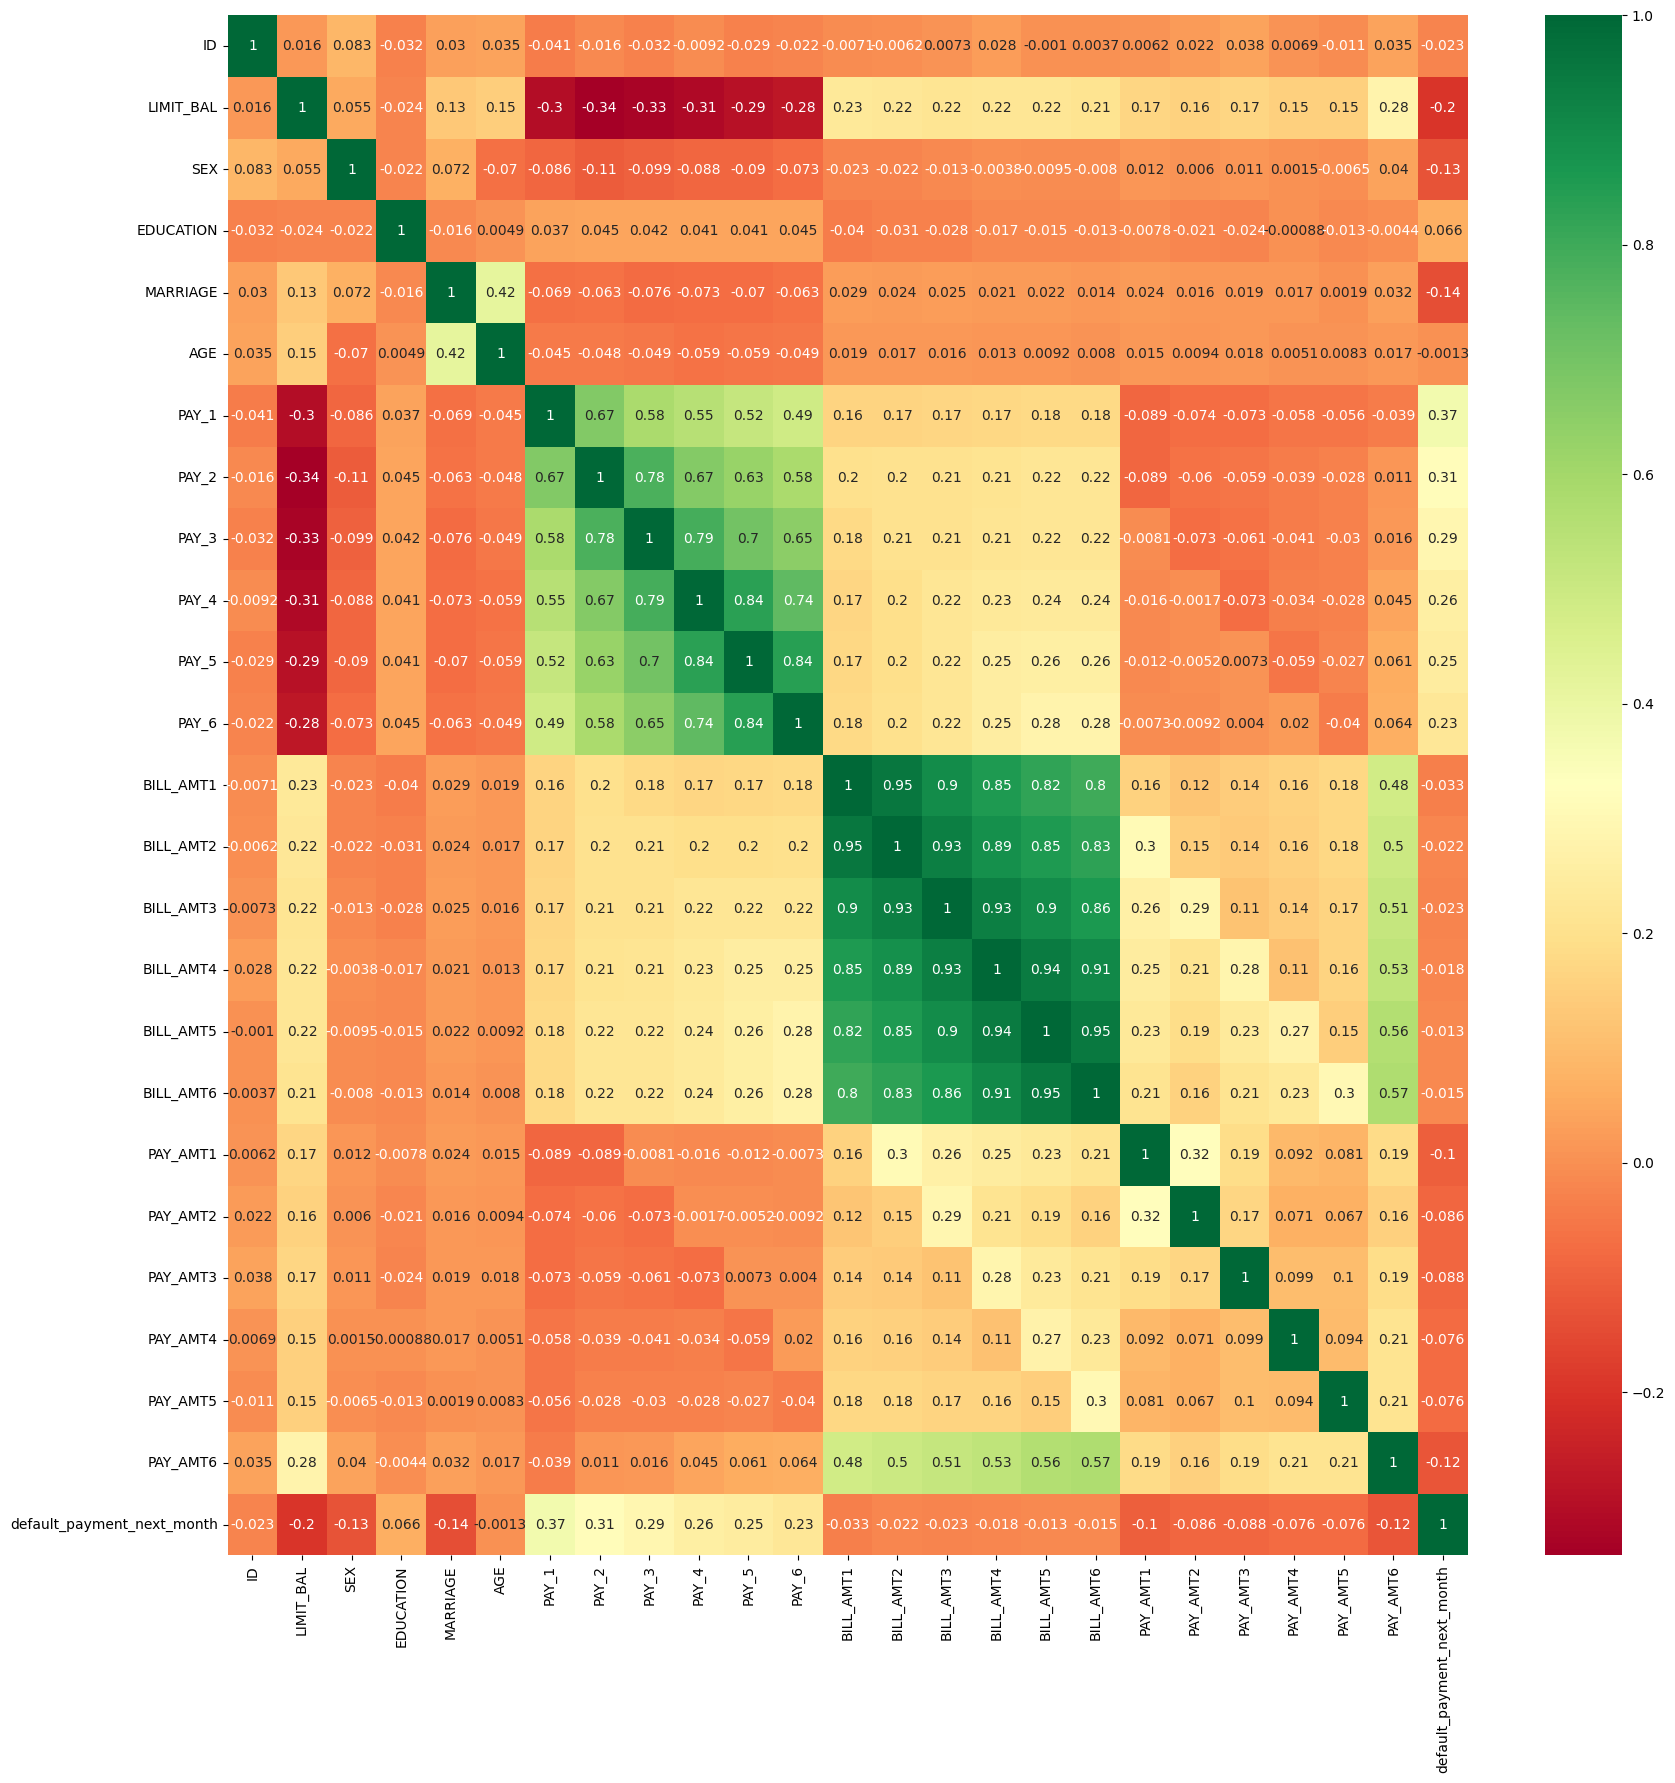

In [36]:
# Buat korelasi
X = dftrain_m.iloc[:,0:26]  
y = dftrain_m.iloc[:,-1]   

corrmat = dftrain_m.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(dftrain_m[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

# method dapat diisi dengan "pearson", "spearman" atau "kendall" sesuai kebutuhan

Dari hasil di atas, sementara dapat disimpulkan bahwa:
- Feature yang memiliki korelasi paling kuat dengan target adalah PAY_1 sampai PAY_6 dalam bentuk korelasi positif
- Sedangkan feature dengan korelasi negatif paling kuat dengan target adalah LIMIT_BAL

## A. Feature Selection 
Menghapus feature yang kurang relevan atau redundan, namun sebelumnya melihat performa dari setiap feature sebelum menghapus beberapa feature yang kurang relevan tersebut

In [37]:
# Memilih fitur yang paling berkorelasi dengan target
X = train_over[['ID', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'BILL_AMT1', 'BILL_AMT2',  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = train_over['default_payment_next_month']

# Pisahkan dataset menjadi data pelatihan dan data validasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Membuat model regresi logistik
model = LogisticRegression()

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Memprediksi data validasi
y_pred = model.predict(X_test)

# Mencetak laporan klasifikasi
print(classification_report(y_test, y_pred))

# Mencetak matriks kebingungan (confusion matrix)
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.69      0.67      2019
           1       0.68      0.65      0.66      2049

    accuracy                           0.67      4068
   macro avg       0.67      0.67      0.67      4068
weighted avg       0.67      0.67      0.67      4068

[[1388  631]
 [ 719 1330]]


diketahui 0
- precision 0.66
- recal 0.69
- f1-score 0.67

diketahui 1
- precision 0.68
- recal 0.65
- f1-score 0.66

diketahui accuracy
- precision -
- recal -
- f1-score 0.67

### 1. Feature Importance

In [39]:
from sklearn.ensemble import RandomForestClassifier

z = train_over.drop(['default_payment_next_month'], axis=1)
w = train_over['default_payment_next_month']

# Membuat model RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(z, w)
# Melatih model
importances = model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)

#mencari 5 score tertinggi dan terendah 
top_scores = [(z.columns[i], importances[i]) for i in indices[:10]]
bottom_scores = [(z.columns[i], importances[i]) for i in indices[-10:]]
               

print("Top 10 feature importance scores:")
for feature, score in top_scores:
  print(f"{feature}: {score}")

print("\nbottom 10 feature importance scores:")
for feature, score in bottom_scores:
  print(f"{feature}: {score}")

Top 10 feature importance scores:
PAY_1: 0.15054637268431673
PAY_2: 0.11161158150537759
PAY_4: 0.062068270872733505
PAY_3: 0.06051967016210288
PAY_6: 0.05220417703499967
PAY_5: 0.04938460892558256
ID: 0.04319908623059101
BILL_AMT1: 0.03891510738315949
LIMIT_BAL: 0.03861987589111762
AGE: 0.03555923313702414

bottom 10 feature importance scores:
BILL_AMT4: 0.03272014059148174
BILL_AMT5: 0.031181702901095603
BILL_AMT6: 0.03032102449486271
PAY_AMT3: 0.029108399036011735
PAY_AMT5: 0.028271118660457412
PAY_AMT4: 0.027978222364433283
PAY_AMT6: 0.027702342852294972
SEX: 0.007432218729567466
MARRIAGE: 0.007014625680425036
EDUCATION: 0.0008996626034117408


Dari Hasil score importance dari masing-masing fitur diatas kita dapat membuang beberapa fitur dengan score terendah yang tidak memiliki tujuan dari analisis dan prediksi kita Tetap sebegai bahan pertimbangkan akan dilihat lagi seberapa baik feature yang dihapus dalam performa 

melihat performa dari setiap feature setelah menghapus beberapa feature yang kurang relevan
- feature yang dihapus adalah ID,EDUCATION,MARRIAGE,SEX

In [40]:
# Memilih fitur yang paling berkorelasi dengan target
X = train_over[['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = train_over['default_payment_next_month']

# Pisahkan dataset menjadi data pelatihan dan data validasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Membuat model regresi logistik
model = LogisticRegression()

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Memprediksi data validasi
y_pred = model.predict(X_test)

# Mencetak laporan klasifikasi
print(classification_report(y_test, y_pred))

# Mencetak matriks kebingungan (confusion matrix)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      2019
           1       0.68      0.67      0.68      2049

    accuracy                           0.68      4068
   macro avg       0.68      0.68      0.68      4068
weighted avg       0.68      0.68      0.68      4068

[[1382  637]
 [ 666 1383]]


diketahui performa meningkat setelah 3 feature diatas telah dihapuskan 

###kesimpulan 
dari metode yang digunakan untuk mencari feature yang kurangg relevan dan dapat dihapuskan disimpulkan Feature ID,education, sex, dan marriage merupakan fitur yang dianggap kurang relevan dalam kasus Payment Default Credit karena tidak memiliki korelasi yang kuat dengan target variabel (default payment next month).
- fitur ID dianggap kurang relevan karna tidak terlalu mempengaruhi seseorang dalam membayar hutang.
- fitur sex (jenis kelamin) juga dianggap kurang relevan karena pada umumnya jenis kelamin tidak mempengaruhi kemampuan seseorang dalam membayar hutang.

- Feature marriage (status pernikahan)  dihapus  karena tidak relevan dengan risiko default pada kartu kredit. Dalam konteks ini, status pernikahan tidak memberikan informasi yang signifikan dalam memprediksi apakah nasabah akan mengalami keterlambatan pembayaran atau wanprestasi.
 dengan menghapus fitur marriage, model prediksi risiko kredit dapat menjadi lebih fokus pada faktor-faktor yang lebih relevan dan dapat meningkatkan akurasi dalam memprediksi risiko default pada kartu kredit.

- feature education ( tingkat pendidikan ) karena tingkat pendidikan seseorang tidak menjamin seseorang memiliki sebuah pekerjaan atau kepribadian dalam mengolah keuangan. maka dari itu feature ini kurang relevan  


In [42]:
# Drop Feature

train_over = train_over.drop(['ID', 'SEX', 'EDUCATION', 'MARRIAGE'], axis=1)

#Menyimpan file dtaframe yang telah diubah ke file csv yang baru
train_over.to_csv('trainx.csv', index=False)




In [43]:
train_over.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,-1.042225,2.973527,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-0.597491,-0.637795,...,-0.574711,-0.553794,-0.674198,0.087543,0.371369,-0.313067,0.342145,-0.184595,0.312780,0
1,-1.124960,-1.230979,0.0,0.0,0.0,0.0,0.0,0.0,-0.439644,-0.419795,...,-0.352755,-0.320473,-0.301637,-0.248242,-0.197996,-0.227015,-0.251604,-0.250182,-0.825059,0
2,2.680833,1.356409,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.720650,-0.731418,...,-0.687122,-0.709617,-0.252002,-0.331343,-0.264379,-0.187070,-0.290846,1.594598,-0.718702,0
3,0.612468,0.062715,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.704960,-0.728263,...,-0.708691,-0.668335,-0.677726,-0.317223,-0.156776,-0.273716,-0.123148,-0.199462,-0.714118,0
4,-0.380348,-0.907556,0.0,0.0,0.0,0.0,0.0,0.0,0.092160,0.006902,...,-0.074926,-0.003504,-0.182067,-0.214855,-0.168453,-0.178309,-0.145732,-0.190117,0.028550,0


## B. Feature Extraction
Membuat Feature Baru dari feature yang sudah ada pada dataset

### 1. total_payment_ratio

In [44]:
# Hitung total pembayaran dan total tagihan
train_over['total_payment'] = train_over['PAY_AMT1'] + train_over['PAY_AMT2'] + train_over['PAY_AMT3'] + train_over['PAY_AMT4'] + train_over['PAY_AMT5'] + train_over['PAY_AMT6']
train_over['total_bill'] = train_over['BILL_AMT1'] + train_over['BILL_AMT2'] + train_over['BILL_AMT3'] + train_over['BILL_AMT4'] + train_over['BILL_AMT5'] + train_over['BILL_AMT6']

# Hitung rasio total pembayaran dengan total tagihan
train_over['total_payment_ratio'] = train_over['total_payment'] / train_over['total_bill']

# Cetak hasil
train_over.head(5)

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,total_payment,total_bill,total_payment_ratio
0,-1.042225,2.973527,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-0.597491,-0.637795,...,0.087543,0.371369,-0.313067,0.342145,-0.184595,0.312780,0,0.616176,-3.573014,-0.172453
1,-1.124960,-1.230979,0.0,0.0,0.0,0.0,0.0,0.0,-0.439644,-0.419795,...,-0.248242,-0.197996,-0.227015,-0.251604,-0.250182,-0.825059,0,-2.000099,-2.213762,0.903484
2,2.680833,1.356409,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.720650,-0.731418,...,-0.331343,-0.264379,-0.187070,-0.290846,1.594598,-0.718702,0,-0.197741,-3.822455,0.051732
3,0.612468,0.062715,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.704960,-0.728263,...,-0.317223,-0.156776,-0.273716,-0.123148,-0.199462,-0.714118,0,-1.784444,-4.178034,0.427101
4,-0.380348,-0.907556,0.0,0.0,0.0,0.0,0.0,0.0,0.092160,0.006902,...,-0.214855,-0.168453,-0.178309,-0.145732,-0.190117,0.028550,0,-0.868916,-0.128079,6.784238


Rasio total pembayaran atau total payment ratio adalah rasio antara jumlah pembayaran yang telah dilakukan oleh nasabah pada tagihan kartu kredit mereka dalam periode waktu tertentu (misalnya, 6 bulan terakhir) dibandingkan dengan total tagihan yang harus dibayarkan dalam periode waktu yang sama. Dengan kata lain, rasio ini mengukur seberapa banyak dari total tagihan yang telah dibayarkan oleh nasabah.

Rasio total pembayaran dapat memberikan indikasi tentang kemampuan nasabah dalam membayar tagihan mereka. Semakin tinggi rasio pembayaran, semakin baik kemampuan nasabah untuk membayar tagihan mereka dalam waktu yang ditentukan. Sebaliknya, jika rasio pembayaran rendah, maka ini bisa menjadi tanda bahwa nasabah mungkin mengalami kesulitan dalam membayar tagihan mereka tepat waktu.

Dalam industri kartu kredit, rasio total pembayaran ini merupakan salah satu indikator kredit yang penting untuk mengevaluasi risiko kredit nasabah. Semakin tinggi rasio pembayaran, semakin rendah risiko kredit nasabah, dan semakin rendah kemungkinan mereka akan menjadi pembayaran yang macet atau wanprestasi. Oleh karena itu, rasio total pembayaran juga dapat digunakan sebagai salah satu fitur dalam model prediksi risiko kredit atau default pada industri kartu kredit.

### 2. credit_utilization_ratio

In [45]:
# Hitung nilai rata-rata dari fitur 'fitur1', 'fitur2', 'fitur3'
train_over['bill_amount_rata_rata'] = train_over[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)

# Tampilkan dataset dengan fitur baru 'rata_rata'
train_over.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,total_payment,total_bill,total_payment_ratio,bill_amount_rata_rata
0,-1.042225,2.973527,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-0.597491,-0.637795,...,0.371369,-0.313067,0.342145,-0.184595,0.312780,0,0.616176,-3.573014,-0.172453,-0.607598
1,-1.124960,-1.230979,0.0,0.0,0.0,0.0,0.0,0.0,-0.439644,-0.419795,...,-0.197996,-0.227015,-0.251604,-0.250182,-0.825059,0,-2.000099,-2.213762,0.903484,-0.366861
2,2.680833,1.356409,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.720650,-0.731418,...,-0.264379,-0.187070,-0.290846,1.594598,-0.718702,0,-0.197741,-3.822455,0.051732,-0.620162
3,0.612468,0.062715,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.704960,-0.728263,...,-0.156776,-0.273716,-0.123148,-0.199462,-0.714118,0,-1.784444,-4.178034,0.427101,-0.697595
4,-0.380348,-0.907556,0.0,0.0,0.0,0.0,0.0,0.0,0.092160,0.006902,...,-0.168453,-0.178309,-0.145732,-0.190117,0.028550,0,-0.868916,-0.128079,6.784238,-0.032287


In [46]:
# Create a new feature 'credit_utilization_ratio'
train_over['credit_utilization_ratio'] = train_over['bill_amount_rata_rata'] / train_over['LIMIT_BAL'] * 100

#Format percentage with two decimal points and percent sign
train_over['credit_utilization_ratio'] = train_over['credit_utilization_ratio'].apply(lambda x: '{:.2f}%'.format(x))

# Print the result
train_over.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,total_payment,total_bill,total_payment_ratio,bill_amount_rata_rata,credit_utilization_ratio
0,-1.042225,2.973527,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-0.597491,-0.637795,...,-0.313067,0.342145,-0.184595,0.312780,0,0.616176,-3.573014,-0.172453,-0.607598,58.30%
1,-1.124960,-1.230979,0.0,0.0,0.0,0.0,0.0,0.0,-0.439644,-0.419795,...,-0.227015,-0.251604,-0.250182,-0.825059,0,-2.000099,-2.213762,0.903484,-0.366861,32.61%
2,2.680833,1.356409,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-0.720650,-0.731418,...,-0.187070,-0.290846,1.594598,-0.718702,0,-0.197741,-3.822455,0.051732,-0.620162,-23.13%
3,0.612468,0.062715,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.704960,-0.728263,...,-0.273716,-0.123148,-0.199462,-0.714118,0,-1.784444,-4.178034,0.427101,-0.697595,-113.90%
4,-0.380348,-0.907556,0.0,0.0,0.0,0.0,0.0,0.0,0.092160,0.006902,...,-0.178309,-0.145732,-0.190117,0.028550,0,-0.868916,-0.128079,6.784238,-0.032287,8.49%


Rasio penggunaan kredit (credit utilization ratio) menggambarkan seberapa banyak kredit yang digunakan oleh pengguna dalam persentase dari total kredit yang tersedia. Rasio penggunaan kredit biasanya dihitung dengan membagi saldo tagihan saat ini dengan batas kredit yang tersedia. Contohnya, jika pengguna memiliki saldo tagihan sebesar 5000 dan batas kredit sebesar 10000, maka rasio penggunaan kreditnya adalah 50%.

Rasio penggunaan kredit dapat menjadi indikator penting untuk menentukan risiko pembayaran yang tidak lancar atau mengalami keterlambatan. Semakin tinggi rasio penggunaan kredit, semakin tinggi risiko pembayaran yang tidak lancar, karena pengguna mungkin kesulitan membayar tagihan bulanan yang semakin tinggi. Oleh karena itu, pada dataset "Default of Credit Card Clients", rasio penggunaan kredit sering digunakan sebagai salah satu fitur dalam memprediksi default pembayaran bulanan.

Beberapa studi telah menunjukkan bahwa rasio penggunaan kredit mempengaruhi skor kredit individu dan tingkat kepercayaan kreditur terhadap pengguna. Selain itu, rasio penggunaan kredit juga dapat memengaruhi kemampuan seseorang untuk memperoleh kredit lebih lanjut di masa depan. Oleh karena itu, rasio penggunaan kredit dapat menjadi indikator penting dalam menentukan kesehatan keuangan seseorang dan kelayakan kredit.

 rasio penggunaan kredit dapat dihitung dengan membagi "LIMIT_BAL" (batas kredit) dengan jumlah total saldo tagihan di setiap bulan. Rasio ini kemudian digunakan sebagai fitur dalam memprediksi default pembayaran bulanan. Dalam beberapa kasus, rasio penggunaan kredit juga dapat dihitung dengan menggunakan saldo tagihan pada bulan sebelumnya, atau rata-rata saldo tagihan dalam beberapa bulan terakhir, untuk memberikan gambaran yang lebih akurat tentang kebiasaan pengguna dalam menggunakan kredit.

## C. Feature Tambahan
Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

1. Kategori Belanja/Penggunaan Kartu Kredit : Untuk melihat pola konsumsi nasabah
2. Jumlah Pengeluaran : Untuk melihat jumlah tagihan
3. Bunga/Denda : Untuk men-track jumlah tagihan 
3. Pendapatan : Untuk mengukur kemampuan nasabah membayar tagihan